# Introduction
#### Review analysis and audience score prediction

In this part, we firstly check whether tomatometer can be predicted well by critical reviews. Then we does sentiment analysis on critical reviews. Finally, based on sentiment scores and other factors, we predict audience scores

In [2]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import requests
from bs4 import BeautifulSoup as bsp

In [ ]:
import nltk

# Part1. Data Import and Manipulation

In [4]:
df = pd.read_csv('animation_9600info_withrate.csv')
budget = pd.read_csv('movieBudgets(2).csv')

In [28]:
budget

,Unnamed: 0,Rank,Release Date,Movie name,Production Budget,Domestic Gross,Worldwide Gross,Production Countries,url
0,0,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",United States,https://www.the-numbers.com/movie/Pirates-of-t...
1,1,2,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,795,473,000",United States,https://www.the-numbers.com/movie/Avengers-End...
2,2,3,"Apr 22, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",United States,https://www.the-numbers.com/movie/Avengers-Age...
3,3,4,"Dec 13, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",United States,https://www.the-numbers.com/movie/Star-Wars-Ep...
4,4,5,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",United States,https://www.the-numbers.com/movie/Star-Wars-Ep...
5,5,6,"Apr 25, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",United States,https://www.the-numbers.com/movie/Avengers-Inf...
6,6,7,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425",United States,https://www.the-numbers.com/movie/Pirates-of-t...
7,7,8,"Nov 13, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",United States,https://www.the-numbers.com/movie/Justice-Leag...
8,8,9,"Oct 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923","United Kingdom, United States",https://www.the-numbers.com/movie/Spectre#tab=...
9,9,10,"Jul 19, 2012",The Dark Knight Rises,"$275,000,000","$448,139,099","$1,084,439,099",United States,https://www.the-numbers.com/movie/Dark-Knight-...


In [6]:
df = df.merge(budget, left_on = 'title', right_on = 'Movie name')

# Part2: Sentiment Analysis

In [24]:
def get_nrc_data():
    nrc = "C:/Users/56284/OneDrive/4523/10.9/data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

In [25]:
def emotion_analyzer(text,emotion_dict=get_nrc_data()):
    #Set up the result dictionary
    #.values() return list like object with each element the value of each key
    # emotions is a set with all values in emotion_dict
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    #Analyze the text and normalize by total number of words
    total_words = len(text.split())
    #text.split(): a list with all words in it
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

In [165]:
emotion_analyzer(black_panther_reviews)

{'anticipation': 0.021261763680724983,
 'anger': 0.008278145695364234,
 'joy': 0.023353084698501187,
 'disgust': 0.004444057162774483,
 'sadness': 0.010020913210177772,
 'positive': 0.055420006971069656,
 'trust': 0.028842802370163723,
 'fear': 0.010718020216103187,
 'surprise': 0.012373649355176049,
 'negative': 0.019431857790170804}

In [15]:
def get_critic_reviews(url):
    review_list = ''
    page = 1
    try:
        url_page = 'https://www.rottentomatoes.com'+url+'?type=&sort=&page='+str(page)
    except:
        return ''
    while True:
        response = requests.get(url_page)
        response_page = bsp(response.content, 'lxml')
        reviews = response_page.find_all('div', class_ = 'the_review')
        if not reviews:
            return review_list
        for review in reviews:
                review_list+=review.text.strip()
        page +=1
        url_page = 'https://www.rottentomatoes.com'+url+'?type=&sort=&page='+str(page)

In [27]:
def dict_column(dict_emotion):
    return dict_emotion['fear'], dict_emotion['negative'], dict_emotion['sadness'], dict_emotion['trust'],\
dict_emotion['positive'], dict_emotion['surprise'], \
dict_emotion['disgust'],dict_emotion['anticipation'],\
dict_emotion['joy'], dict_emotion['anger']

In [26]:
df['review_dict'] = df['reviews'].apply(emotion_analyzer)

In [27]:
df['fear'], df['negative'], df['sadness'], df['trust'], df['positive'], df['surprise'], df['disgust'], df['anticipation'], df['joy'], df['anger'] = zip(*df['review_dict'].apply(dict_column))

In [48]:
df.to_csv('reviews.csv')
df = pd.read_csv('reviews.csv')
df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], inplace= True)

In [11]:
df.iloc[-10:, :]

,title,synopsis,genre,director,audiencescore,tomatometer,criticreview,actor,director_rating,actor_rate,...,fear,negative,sadness,trust,positive,surprise,disgust,anticipation,joy,anger
2479,Final Destination 3,Death once again shows he's determined to get ...,Action & Adventure,/celebrity/1036363-james_wong,0.43,0.57,/m/final_destination_3/reviews/,/celebrity/1167982-mary_elizabeth_winstead,23.000000,49.290323,...,0.033144,0.048408,0.026167,0.023550,0.037505,0.021369,0.025730,0.026167,0.018753,0.028347
2480,The Shaggy Dog,An unexpected transformation helps a workaholi...,Action & Adventure,/celebrity/brian_robbins,0.26,0.39,/m/shaggy_dog/reviews/,/celebrity/tim_allen,31.888889,37.414634,...,0.009314,0.025490,0.008333,0.018627,0.049020,0.014216,0.007353,0.019118,0.023529,0.007353
2481,V for Vendetta,"Based on the graphic novel by Alan Moore, V fo...",Action & Adventure,/celebrity/1165744-james_mcteigue,0.72,0.90,/m/v_for_vendetta/reviews/,/celebrity/natalie_portman,30.600000,45.820000,...,0.016477,0.029902,0.008950,0.019731,0.043938,0.011798,0.007933,0.016884,0.016070,0.015867
2482,Inside Man,The volatile showdown between a determined cop...,Action & Adventure,/celebrity/spike_lee,0.86,0.85,/m/inside_man/reviews/,/celebrity/denzel_washington,56.136364,47.267857,...,0.012008,0.018012,0.006244,0.026897,0.051393,0.010567,0.005043,0.019452,0.018252,0.008886
2483,Brick,"""Brick,"" while taking its cues and its verbal ...",Action & Adventure,/celebrity/1167238-rian_johnson,0.79,0.86,/m/brick/reviews/,/celebrity/joseph_gordonlevitt,89.750000,43.979167,...,0.008894,0.023975,0.010054,0.024749,0.042923,0.008121,0.006961,0.010828,0.010054,0.010054
2484,Lonesome Jim,Jim begrudgingly returns to his hometown in ru...,Comedy,/celebrity/steve_buscemi,0.60,0.57,/m/lonesome_jim/reviews/,/celebrity/casey_affleck,70.250000,53.250000,...,0.015216,0.035910,0.020694,0.016433,0.036519,0.009130,0.005478,0.012781,0.012173,0.009130
2485,Larry the Cable Guy: Health Inspector,A laid-back health inspector's comfortable rou...,Comedy,/celebrity/trent-cooper,0.05,0.52,/m/larry_the_cable_guy_health_inspector/reviews/,/celebrity/larry_the_cable_guy,2.500000,14.714286,...,0.015504,0.054264,0.017054,0.018605,0.038760,0.007752,0.029457,0.027907,0.013953,0.017054
2486,Scary Movie 4,What do you get when you mix fearless comedic ...,Comedy,/celebrity/david_zucker,0.35,0.51,/m/scary_movie_4/reviews/,/celebrity/1131130-anthony_anderson,49.545455,37.957447,...,0.011245,0.030522,0.012450,0.021285,0.032932,0.012048,0.012048,0.020080,0.019277,0.013253
2487,The Lost City,Andy Garcia stars and makes his directorial de...,Drama,/celebrity/andy_garcia,0.25,0.64,/m/10002516-lost_city/reviews/,/celebrity/andy_garcia,12.500000,28.671429,...,0.009500,0.032932,0.022799,0.023433,0.048765,0.008866,0.006966,0.025966,0.023433,0.018366
2488,Cavite,A young man unwillingly becomes embroiled in a...,Art House & International,/celebrity/ian-gamazon,0.73,0.54,/m/1162654-cavite/reviews/,/celebrity/ian-gamazon,36.500000,0.000000,...,0.019925,0.028643,0.009963,0.026152,0.049813,0.016189,0.006227,0.021171,0.017435,0.014944


#### Validate the score system
Regress tomatomaters on vecorized reviews and decide whether the rating system is reasonbale by checking MSE
- Split data into training and testing set
- Use TF-IDF to vecotize critical reviews
- Using linear regression, regression tree and random forests to regress tomatometer on vectorized reviews

In [64]:
from sklearn.model_selection import train_test_split
documents_train, documents_test, target_train, target_test = \
train_test_split(df['reviews'], df['tomatometer'], random_state = 1, test_size=0.3)

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer = 'word', stop_words = 'english', 
                             lowercase = True, max_features = 5000
                            )
# Train the model with my training data
documents_train_vec = vectorizer.fit_transform(documents_train).toarray()
# Get the vocab of your tfidf
words = vectorizer.get_feature_names()
# Use the trained model to transform your test data
documents_test_vec = vectorizer.transform(documents_test).toarray()

In [66]:
from sklearn.linear_model import LinearRegression

model3 = LinearRegression()
model3.fit(documents_train_vec, target_train)
prediction3 = model3.predict(documents_test_vec)
mse3 = np.mean((target_test-prediction3)**2)
print(f'MSE of linear regression is {mse3}')

MSE of linear regression is 0.022267802383909106


In [67]:
from sklearn.tree import DecisionTreeRegressor

model4 = DecisionTreeRegressor(max_depth = 25, min_samples_leaf= 5, 
                             min_samples_split=5, random_state = 1)
model4.fit(documents_train_vec, target_train)
prediction4 = model4.predict(documents_test_vec)
mse4 = np.mean((target_test-prediction4)**2)
print(f'MSE of regression tree is {mse4}')

MSE of regression tree is 0.03609033411714382


In [68]:
from sklearn.ensemble  import RandomForestRegressor

model5=RandomForestRegressor(n_estimators=1000,bootstrap=True,max_depth=25)
model5.fit(documents_train_vec, target_train)
prediction5 = model5.predict(documents_test_vec)
mse5 = np.mean((target_test-prediction5)**2)
print(f'MSE of random forests is {mse5}')

MSE of random forests is 0.01789848050837544


For all of the 3 machine learning method, we all see relatively low MSE, which means that reviews can really explain tomatometers well. Therefore, tomatomaters can be regarded as a professional score system

# Part4. Predict audiencescore

#### Average tomatomater for different genres

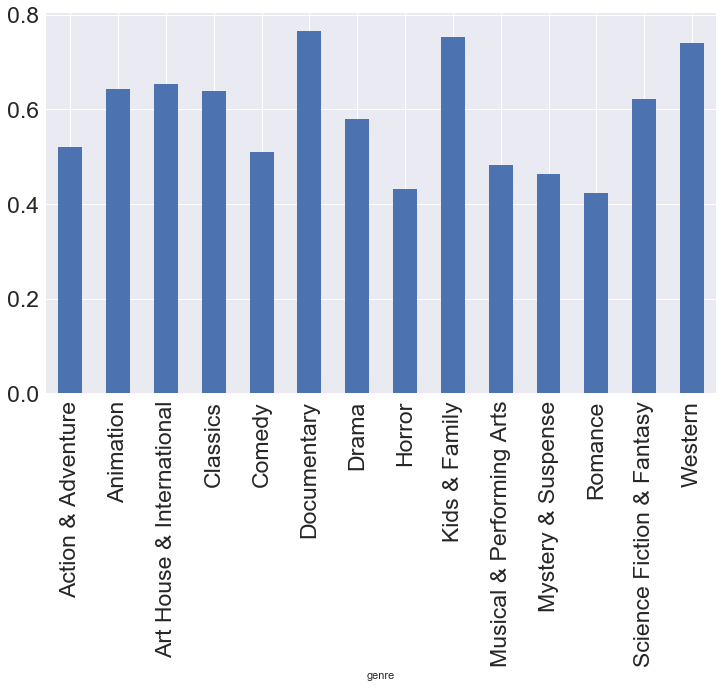

In [151]:
plt.style.use('seaborn')
plt.tick_params(labelsize=23)
df.groupby('genre')['audiencescore'].mean().plot(kind = 'bar', figsize=(12,7))
#plt.title('average tomatometer vs genre', size = 30)

#### Scatter of audiencescore and tomatomater

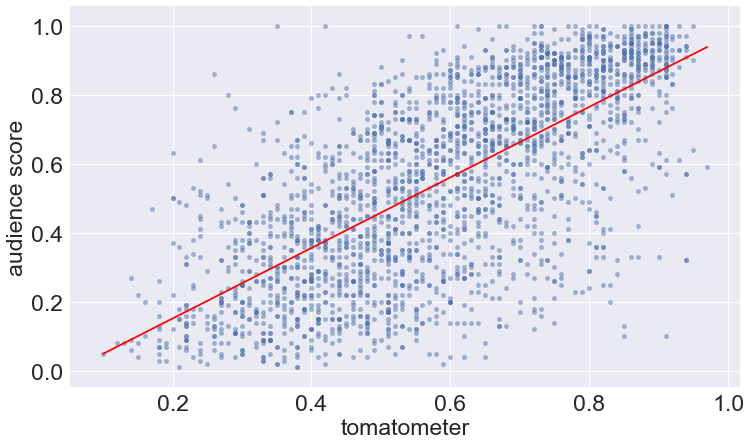

In [159]:
df_filtered1 = df[(df['audiencescore']!=0)&(df['tomatometer']!=0)]
df_filtered1.plot("tomatometer","audiencescore",kind='scatter',alpha=0.5, figsize=(12,7))#,title="tomatoemeter v/s audiencescore =" + str(round(np.corrcoef(df['tomatometer'], df['audiencescore'])[0][1],2)))
m, b = np.polyfit(df_filtered1['tomatometer'], df_filtered1['audiencescore'], 1)
x = np.linspace(df_filtered1['tomatometer'].min(), df_filtered1['tomatometer'].max(), 1000)
plt.xlabel('tomatometer', fontsize=23)
plt.ylabel('audience score', fontsize=23)
plt.tick_params(labelsize=23)
plt.plot(x, m*x +b, 'r-')
plt.show()

#### Scatter of audiencescore and director_rating

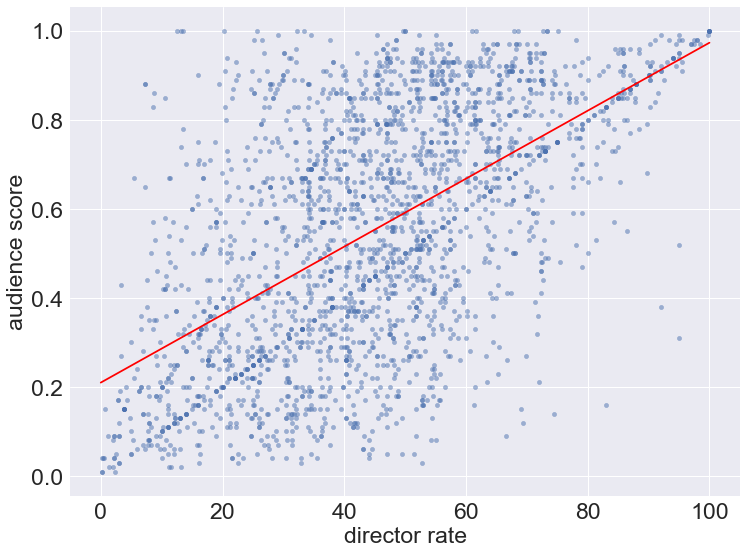

In [163]:
df_filtered2 = df[(df['audiencescore']!=0)&(df['director_rating']!=0)]
df_filtered2.plot("director_rating","audiencescore",kind='scatter',alpha=0.5 ,figsize=(12,9))#,title="director_rating v/s audiencescore =" + str(round(np.corrcoef(df_filtered2['director_rating'], df_filtered2['audiencescore'])[0][1],2)) ,figsize=(12,7))
m, b = np.polyfit(df_filtered2['director_rating'], df_filtered2['audiencescore'], 1)
x = np.linspace(df['director_rating'].min(), df['director_rating'].max(), 1000)
plt.xlabel('director rate', fontsize=23)
plt.ylabel('audience score', fontsize=23)
plt.tick_params(labelsize=23)
plt.plot(x, m*x +b, 'r-')
plt.show()

#### Scatter of audiencescore and actor_rating

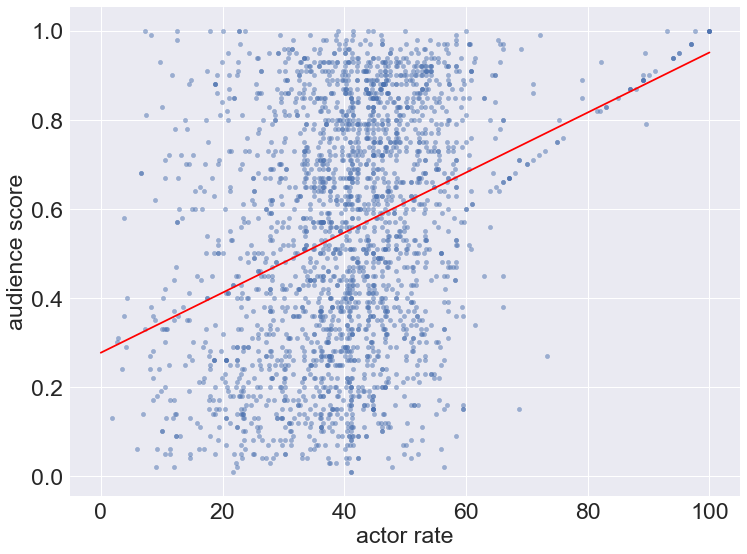

In [164]:
df_filtered2 = df[(df['audiencescore']!=0)&(df['actor_rate']!=0)]
df_filtered2.plot("actor_rate","audiencescore",kind='scatter',alpha=0.5,figsize=(12,9))#,title="actor_rate v/s audiencescore =" + str(round(np.corrcoef(df['actor_rate'], df['audiencescore'])[0][1],2)) ,figsize=(12,9))
m, b = np.polyfit(df_filtered2['actor_rate'], df_filtered2['audiencescore'], 1)
x = np.linspace(df['actor_rate'].min(), df['actor_rate'].max(), 1000)
plt.plot(x, m*x +b, 'r-')
plt.xlabel('actor rate', fontsize=23)
plt.ylabel('audience score', fontsize=23)
plt.tick_params(labelsize=23)
plt.show()

#### Regress audiencescore on tomatometer, genre, actor_rating, director_rating and sentiment scores

In [13]:
model2 = ols(formula = 'audiencescore~tomatometer+C(genre)+actor_rate+director_rating+fear+negative+sadness+trust+positive+surprise+disgust+anticipation+joy+anger', data = df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          audiencescore   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     212.4
Date:                Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:32:36   Log-Likelihood:                 1123.4
No. Observations:                2489   AIC:                            -2193.
Df Residuals:                    2462   BIC:                            -2036.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

#### Predict audiencescores for upcoming movies

In [30]:
coming_movies = pd.read_csv('coming_soon.csv')
coming_movies['reviews'] = comming_movies['criticreview'].apply(get_critic_reviews)

In [29]:
coming_movies['review_dict'] = coming_movies['reviews'].apply(emotion_analyzer)
coming_movies['fear'], coming_movies['negative'], coming_movies['sadness'], coming_movies['trust'], coming_movies['positive'], coming_movies['surprise'], coming_movies['disgust'], coming_movies['anticipation'], coming_movies['joy'], coming_movies['anger'] = zip(*coming_movies['review_dict'].apply(dict_column))

In [168]:
coming_movies

,title,synopsis,genre,director,tomatometer,criticreview,actor,actor_rate,director_rating,reviews,...,negative,sadness,trust,positive,disgust,anticipation,joy,anger,surprsise,surprise
0,Richard Jewell,Directed by Clint Eastwood and based on true e...,Drama,/celebrity/clint_eastwood,0.94,/m/richard_jewell/reviews/,/celebrity/sam_rockwell,49.888889,65.333333,A filmic depiction of [the] public record surr...,...,0.021845,0.004854,0.041262,0.055825,0.002427,0.024272,0.024272,0.004854,0.016990,0.016990
1,The Death and Life of John F. Donovan,A decade after the death of an American TV sta...,Drama,/celebrity/xavier_dolan,0.19,/m/the_death_and_life_of_john_f_donovan/reviews/,/celebrity/kit_harington,40.384615,72.571429,"Dolan's most conventional film, and consequent...",...,0.025404,0.016166,0.020785,0.032333,0.009238,0.013857,0.009238,0.016166,0.004619,0.004619
2,Rabid,"A ""Plain-Jane"" designer is having difficultly ...",Horror,/celebrity/jen_soska,0.63,/m/rabid_2019/reviews/,/celebrity/laura_vandervoort,14.750000,56.000000,Rabid is a shabby horror-less horror with litt...,...,0.033898,0.016949,0.022599,0.045198,0.022599,0.005650,0.005650,0.011299,0.011299,0.011299
3,A Hidden Life,"Based on real events, A HIDDEN LIFE is the sto...",Drama,/celebrity/terrence_malick,0.80,/m/a_hidden_life_2019/reviews/,/celebrity/august_diehl,32.736842,62.083333,"Malick tells a story that is emotionally epic,...",...,0.019411,0.011379,0.031459,0.058233,0.005355,0.030120,0.031459,0.008032,0.015395,0.015395
4,Uncut Gems,From acclaimed filmmakers Josh and Benny Safdi...,Drama,/celebrity/josh_safdie,0.95,/m/uncut_gems/reviews/,/celebrity/adam_sandler,37.709677,48.444444,It gets on your nerves in the best way.Probabl...,...,0.034580,0.016231,0.019760,0.040932,0.011291,0.025406,0.015526,0.019054,0.015526,0.015526
5,Little Women,classic novel and the writings of Louisa May A...,Drama,/celebrity/greta_gerwig_2,0.98,/m/little_women_2019/reviews/,/celebrity/saoirse_ronan,58.291667,92.000000,"Fresh, sparkling, natural and full of soul.Gre...",...,0.010714,0.007143,0.029464,0.066964,0.004464,0.016071,0.031250,0.006250,0.008929,0.008929
6,1917,"At the height of the First World War, two youn...",Drama,/celebrity/sam_mendes,0.92,/m/1917_2019/reviews/,/celebrity/george-mackay,54.173913,55.454545,"No, the long takes don't transform ""1917"" into...",...,0.036074,0.012584,0.020134,0.045302,0.009228,0.017617,0.015940,0.011745,0.011745,0.011745
7,Just Mercy,"A powerful and thought-provoking true story, ""...",Drama,/celebrity/destin_daniel_cretton,0.81,/m/just_mercy/reviews/,/celebrity/michael_b_jordan,41.250000,49.666667,"Naturally, with heavy-hitters like Jordan and ...",...,0.030879,0.014252,0.042755,0.064133,0.009501,0.022961,0.019002,0.015835,0.012668,0.012668
8,Clemency,Years of carrying out death row executions hav...,Drama,/celebrity/chinonye_chukwu,0.98,/m/clemency_2019/reviews/,/celebrity/alfre_woodard,28.822917,49.000000,It's probably the rawest portrayal of the deat...,...,0.062189,0.036070,0.037313,0.065920,0.021144,0.034826,0.013682,0.043532,0.018657,0.018657
9,The Informer,Honorably discharged Special Ops soldier Pete ...,Drama,/celebrity/andrea_di_stefano,0.50,/m/the_informer_2020/reviews/,/celebrity/joel_kinnaman,25.200000,55.000000,,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [169]:
model2.predict(coming_movies)

0     0.983267
1     0.282364
2     0.540440
3     0.784029
4     0.815398
5     1.144928
6     0.894196
7     0.701999
8     0.863216
9     0.438538
10    0.913400
11    0.744541
12    1.053943
dtype: float64